# LOGISTIC REGRESSION 
### (Classification algorithm)
#### Multiple Feature/Variable

Logistic Regression is a classification algorithm and helps to classify data. It gives ***DISCRETE VALUES AS OUTPUT***. Don't confuse with the term regression in it's name. In ML regression means a function which gives continuos value as output. But this one, is a classification algorithm.

####  Hypothesis function:
In logistic regression the hypothesis function is $h_{\theta}(x)$ = $1/(1+$ $e^{-\theta x}$ $)$.

And it's values always lies between 0 and 1.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Let's create some testing data.

          X1        X2    Y
0   0.912190  0.566761  0.0
1   0.654643  0.447080  0.0
2   1.413388  1.071412  0.0
3   1.488451  1.343410  0.0
4   0.297408  0.785011  0.0
5   1.631624  1.848448  0.0
6   1.776483  1.038394  0.0
7   0.886552  1.891113  0.0
8   1.960178  1.567957  0.0
9   0.947597  0.092578  0.0
10  3.132256  2.096577  1.0
11  2.606715  3.513096  1.0
12  2.242631  2.627902  1.0
13  2.316241  3.502989  1.0
14  2.135553  2.214851  1.0
15  3.166587  3.964794  1.0
16  3.127128  3.851593  1.0
17  3.195305  2.991756  1.0
18  3.195324  3.337298  1.0
19  2.980463  3.105019  1.0


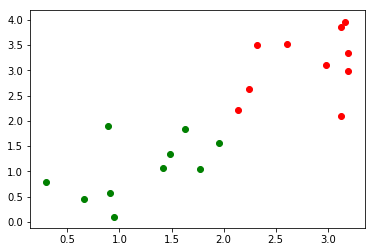

In [51]:
x1 = np.random.random(size=(10))*2
x2 = np.random.random(size=(10))*2

x3 = np.random.random(size=(10))*2 + 2
x4 = np.random.random(size=(10))*2 + 2

y0 = np.zeros(shape=(10))
y1 = np.ones(shape=(10))

plt.scatter(x1,x2, color='g', marker='o')
plt.scatter(x3,x4, color='r', marker='o')

dict_data = { 'X1':np.concatenate((x1,x3)), 
             'X2':np.concatenate((x2,x4)),
             'Y':np.concatenate((y0,y1))}
data = pd.DataFrame(dict_data, index=np.arange(20).reshape(20))
print(data)

So we have classified the green dots as y=0, and the red dots as y=1.

Now let us write an algorithm which will help us to classify new input using the prediction developed from the above training data.

In [52]:
def Gradient_Descent_Matrices_Magic(x, y, l_t, itr):
    #assuming x is (m,n) shaped and y is (m,) or (m,1) shaped
    m = x.shape[0]
    y = y.reshape(m,1)
    x = np.concatenate((np.ones((m,1)),x), axis=1) 
    n = x.shape[1]
    theta = np.random.random(size=(1,n))*0.00001

    cost_func = []
    def cal_cost_func(h_xi):
        sum = 0
        for i in range(m):
            sum += y[i]*math.log(h_xi[i]) + (1-y[i])*math.log(1-h_xi[i])
        return -sum/m
    
    for i in range(itr):
        h_xi = (1/(1 + np.exp(-np.dot(x,np.transpose(theta)))))
        cost_func.append(cal_cost_func(h_xi))
        theta = theta - (l_t/m) * np.dot(np.transpose(h_xi- y) , x)
    
    return theta,cost_func

So plotting cost function vs. iterations to check the algorithm is heading in the right direction.

/home/sachin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


[[-14.14909359   2.93235212   4.16134007]]


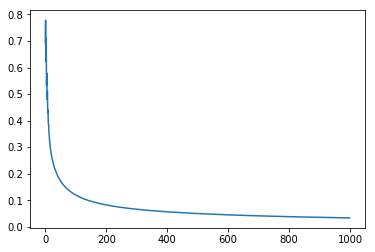

In [97]:
itr = 1000
X = data[['X1','X2']]
Y = data['Y']

theta_result, cost_func = Gradient_Descent_Matrices_Magic(X,Y, 1.2, itr)
print(theta_result)
plt.plot(np.arange(itr), cost_func) 

So the Cost function decreases when the no. of iterations increases. Hence our gradient descent function is right. Now, Let us test the predictions of the model.

In [98]:
def predict(x):
    y_pred = np.sum(np.dot(theta_result,x_check))
    if y_pred<0:
        return 0
    return 1

print(theta_result.shape,'shape of theta')
x_check = np.array([1,1,1]).reshape(3,1)
print(x_check.shape,'shape of testing vector')

print(predict(x_check),'is the prediction')

(1, 3) shape of theta
(3, 1) shape of testing vector
0 is the prediction


So that was correct, as a value of x_0=1, x_1=1, x_2=1. Would lie in the green region, with y=0.

Now to plot the line which will classify the first quadrants in to two parts, basically y=0 and y=1 part.

   $\theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} = 0$ 
        
 is the equation of the line. So to plot it in $x_{1}$ vs $x_{2}$ grpah, we can write 
 
 $x_{2} = -(\theta_{0} + \theta_{1} x_{1})/\theta_{2} $

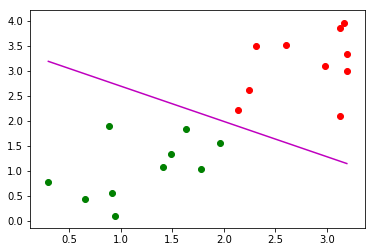

In [113]:
#Taking the max and min point in x1
x_value= np.array([np.min(X_f[:,1]),np.max(X_f[:,1])])
y_value=-(theta_result[0,0] +theta_result[0,1]*x_value)/theta_result[0,2]

plt.plot(x_value,y_value, color='m')
plt.scatter(x1,x2, color='g', marker='o')
plt.scatter(x3,x4, color='r', marker='o')

So this line divides the first quadrant into two parts, any new ($x_{1}$,$x_{2}$) that is passed into this model, will be classified as y=0 (below the magneta line) or y=1 (above the magneta line), depending upon the position of the point i.e. there $x_{1}$ and $x_{2}$ value.

Hence we used Linear Regression to classify our data.